<a href="https://colab.research.google.com/github/Vanduss123/Debt/blob/main/DebtProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://) I am considering different questions to select one, I will make the selection very soon. However, currently, my top choice is  Which debt sectors—households or corporations—show stronger signals before or during past financial crises, as indicated by falling GDP and rising public debt?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Vanduss123/Debt/refs/heads/main/GlobalDebtDatabase.csv')
df.rename(columns={'Total private debt, \nall instruments\n(percent of GDP)': 'Total private debt, all instruments (percent of GDP)'}, inplace=True)
df.rename(columns = {'Total private debt, \nloans and debt securities\n(percent of GDP)' : 'Total private debt, loans and debt securities (percent of GDP)'}, inplace = True)
df.rename(columns = {'Household debt, all instruments\n(percent of GDP)' : 'Household debt, all instruments (percent of GDP)'}, inplace = True)
df.rename(columns = {'Household debt, loans and debt securities\n(percent of GDP)' : 'Household debt, loans and debt securities (percent of GDP)'}, inplace = True)
df.rename(columns = {'Non-financial corporations debt, all instruments\n(percent of GDP)' : 'Non-financial corporations debt, all instruments (percent of GDP)'}, inplace = True)
df.rename(columns = {'Non-financial corporations debt, loans and debt securities\n(percent of GDP)' : 'Non-financial corporations debt, loans and debt securities (percent of GDP)'}, inplace = True)
df.rename(columns = {'Public sector debt\n(percent of GDP)' : 'Public sector debt (percent of GDP)'} , inplace = True)
df.rename(columns = {'General government debt\n(percent of GDP)' : 'General government debt (percent of GDP)',
                     'Central government debt\n(percent of GDP)' : 'Central government debt (percent of GDP)', 'Nominal gross domestic product\n(billions)' : 'Nominal gross domestic product (billions)'}, inplace = True)
df.info()
df.drop(['Nonfinancial public sector debt\n(percent of GDP)', 'Public sector debt (percent of GDP)' ], axis = 1, inplace = True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Year                                                                         74 non-null     int64  
 1   Total private debt, all instruments (percent of GDP)                         74 non-null     float64
 2   Total private debt, loans and debt securities (percent of GDP)               74 non-null     float64
 3   Household debt, all instruments (percent of GDP)                             74 non-null     float64
 4   Household debt, loans and debt securities (percent of GDP)                   74 non-null     float64
 5   Non-financial corporations debt, all instruments (percent of GDP)            74 non-null     float64
 6   Non-financial corporations debt, loans and d

,Year,"Total private debt, all instruments (percent of GDP)","Total private debt, loans and debt securities (percent of GDP)","Household debt, all instruments (percent of GDP)","Household debt, loans and debt securities (percent of GDP)","Non-financial corporations debt, all instruments (percent of GDP)","Non-financial corporations debt, loans and debt securities (percent of GDP)",General government debt (percent of GDP),Central government debt (percent of GDP),Nominal gross domestic product (billions)
0,1950,75.83,55.31,25.48,24.80,50.34,30.51,83.13,78.20,301.78
1,1951,72.69,53.66,24.52,23.91,48.17,29.75,72.96,68.20,348.99
2,1952,88.24,56.56,26.60,25.98,61.64,30.58,72.53,66.34,368.03
3,1953,88.05,58.02,28.43,27.79,59.62,30.22,71.75,64.60,389.15
4,1954,106.06,62.57,31.54,30.86,74.52,31.71,73.57,64.96,390.28


Feedback on Data cleaning:
check on all these points whether they are handled or not:

Remove Metadata Rows-Rows 0–4 contain descriptions, sources, and labels—not actual data. You should drop them

Rename Columns Clearly

Drop Columns with Too Many Missing Values

Convert Numeric Columns-All numeric columns (e.g., GDP, debt figures) are currently stored as strings. Convert them

Handle Missing Values

Trim and Clean Strings-Ensure the country names or string fields are stripped of whitespace

In [3]:

df.info()
df['Year'].head(74) # confirms that there are no duplicates
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Year                                                                         74 non-null     int64  
 1   Total private debt, all instruments (percent of GDP)                         74 non-null     float64
 2   Total private debt, loans and debt securities (percent of GDP)               74 non-null     float64
 3   Household debt, all instruments (percent of GDP)                             74 non-null     float64
 4   Household debt, loans and debt securities (percent of GDP)                   74 non-null     float64
 5   Non-financial corporations debt, all instruments (percent of GDP)            74 non-null     float64
 6   Non-financial corporations debt, loans and d

,Year,"Total private debt, all instruments (percent of GDP)","Total private debt, loans and debt securities (percent of GDP)","Household debt, all instruments (percent of GDP)","Household debt, loans and debt securities (percent of GDP)","Non-financial corporations debt, all instruments (percent of GDP)","Non-financial corporations debt, loans and debt securities (percent of GDP)",General government debt (percent of GDP),Central government debt (percent of GDP),Nominal gross domestic product (billions)
Year,1.000000,0.938104,0.971111,0.918511,0.917798,0.872252,0.972887,0.651383,0.549997,0.937254
"Total private debt, all instruments (percent of GDP)",0.938104,1.000000,0.967404,0.947594,0.947701,0.958073,0.924843,0.583333,0.459689,0.880299
"Total private debt, loans and debt securities (percent of GDP)",0.971111,0.967404,1.000000,0.977306,0.977122,0.872495,0.959325,0.566803,0.442965,0.886044
"Household debt, all instruments (percent of GDP)",0.918511,0.947594,0.977306,1.000000,0.999958,0.816326,0.877810,0.520364,0.385812,0.834130
"Household debt, loans and debt securities (percent of GDP)",0.917798,0.947701,0.977122,0.999958,1.000000,0.816558,0.877338,0.518532,0.384102,0.833947
"Non-financial corporations debt, all instruments (percent of GDP)",0.872252,0.958073,0.872495,0.816326,0.816558,1.000000,0.884784,0.587917,0.485050,0.843413
"Non-financial corporations debt, loans and debt securities (percent of GDP)",0.972887,0.924843,0.959325,0.877810,0.877338,0.884784,1.000000,0.590604,0.489618,0.892241
General government debt (percent of GDP),0.651383,0.583333,0.566803,0.520364,0.518532,0.587917,0.590604,1.000000,0.985608,0.835341
Central government debt (percent of GDP),0.549997,0.459689,0.442965,0.385812,0.384102,0.485050,0.489618,0.985608,1.000000,0.766320
Nominal gross domestic product (billions),0.937254,0.880299,0.886044,0.834130,0.833947,0.843413,0.892241,0.835341,0.766320,1.000000


In [ ]:
''' Possible research questions :
How does debt (household, non-financial corporations and central government debt ) play a role in the GDP of the economy?
How has public sector and government debt affected the total private debt of the economy over the years?
Is household or non-financial corporate data more associated with past financial
crises (marked by a slow in GDP and rise in government debt)
Note that this could also require looking at the time periods of previous
government crises and measuring how debts correlated with those timeframes,
things that may not be present in the current dataset, but may be added as
a new column
'''


Feedback:
May be you can refine your questions this way:
What is the relationship between household, corporate, and government debt levels and GDP across countries and time?
Does an increase in government debt precede or correlate with changes in private debt levels (households + corporations) over time?
Which debt sectors—households or corporations—show stronger signals before or during past financial crises, as indicated by falling GDP and rising public debt?

In [24]:
from sklearn import model_selection
features = df[['Total private debt, loans and debt securities (percent of GDP)', 'General government debt (percent of GDP)']]
label = df['Nominal gross domestic product (billions)']
X_temp, X_test, y_temp, y_test = model_selection.train_test_split(
    features, label, test_size=0.1, random_state=42
)

# Then: split 10% of the remaining 90% for validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42
)
from sklearn.linear_model import LinearRegression;
model = LinearRegression();
model.fit(X_train, y_train);
pred = model.predict(X_val);
from sklearn.metrics import *;
print(accuracy_score(pred,y_val))

ValueError: continuous is not supported

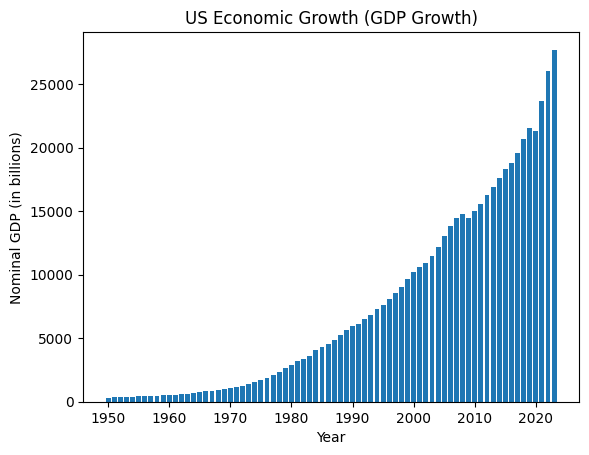

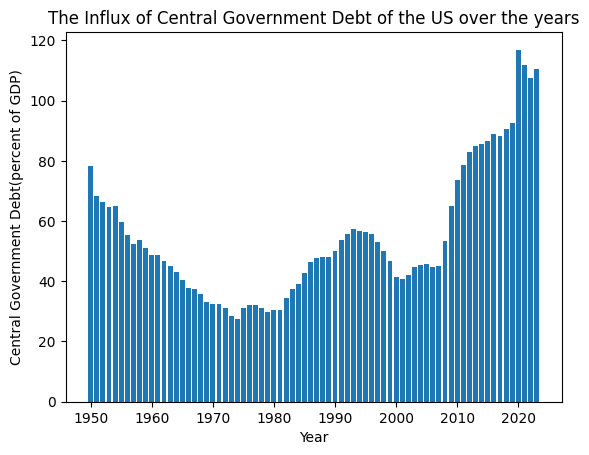

[]

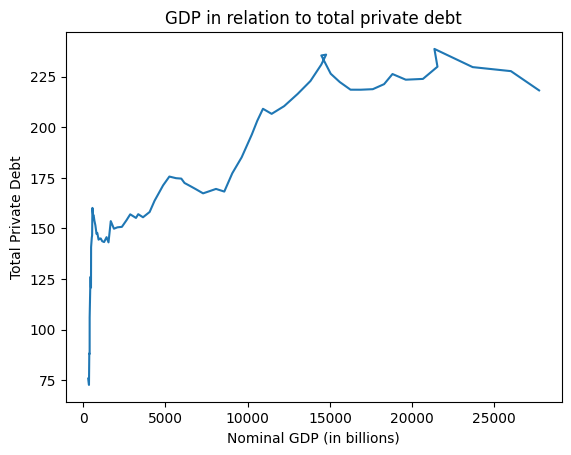

In [25]:
plt.bar(df['Year'], df['Nominal gross domestic product (billions)'])
plt.xlabel("Year")
plt.ylabel("Nominal GDP (in billions)")
plt.title("US Economic Growth (GDP Growth)")
plt.show()
plt.bar(df['Year'], df['Central government debt (percent of GDP)'])
plt.xlabel("Year")
plt.ylabel("Central Government Debt(percent of GDP)")
plt.title("The Influx of Central Government Debt of the US over the years")
plt.show()
'''plt.plot(df['Nominal gross domestic product (billions)'], df['Central government debt (percent of GDP)'])
plt.xlabel("Nominal GDP (billions)")
plt.ylabel("Central government debt (percent of GDP)")
plt.title("Relationship between GDP and Central Government Debt ")
plt.show()
'''
# it is shown that this is not a linear relationship, maybe not so good for comparison?
plt.plot(df['Nominal gross domestic product (billions)'], df['Total private debt, all instruments (percent of GDP)'])
plt.xlabel("Nominal GDP (in billions)")
plt.ylabel("Total Private Debt")
plt.title("GDP in relation to total private debt")
plt.plot()
# this is not linear either, but seems to indicate a positive trend